In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

import matplotx
import numpy as np
import pandas as pd

from scipy.stats import sem

from gptchem.plotsettings import *

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_drfp_linear = []
compiled_drfp_rbf = []
compiled_ohe_tanimoto = []
compiled_rxnfp_linear = []
compiled_rxnfp_rbf = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    drfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_squared_error"],
    }

    compiled_drfp_rbf.append(drfp_rbf_metrics)

    ohe_tanimoto_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["ohe-tanimoto"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_squared_error"],
    }

    compiled_ohe_tanimoto.append(ohe_tanimoto_metrics)

    rxnfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_squared_error"],
    }

    compiled_rxnfp_linear.append(rxnfp_linear_metrics)

    rxnfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_squared_error"],
    }

    compiled_rxnfp_rbf.append(rxnfp_rbf_metrics)

    drfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-linear"]["mean_squared_error"],
    }

    compiled_drfp_linear.append(drfp_linear_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_drfp_linear = pd.DataFrame(compiled_drfp_linear)
compiled_drfp_rbf = pd.DataFrame(compiled_drfp_rbf)
compiled_ohe_tanimoto = pd.DataFrame(compiled_ohe_tanimoto)
compiled_rxnfp_linear = pd.DataFrame(compiled_rxnfp_linear)
compiled_rxnfp_rbf = pd.DataFrame(compiled_rxnfp_rbf)

In [6]:
compiled_drfp_rbf

,num_train_points,mae,max_error,mse
0,200,11.428460,44.509787,230.745834
1,20,23.249224,59.114185,733.853472
2,50,11.756540,42.420624,225.529368
3,50,15.331979,55.662196,349.949260
4,50,23.702256,55.272698,746.500877
...,...,...,...,...
147,20,18.033753,46.499116,456.756022
148,100,11.592911,56.734534,250.304191
149,50,23.702256,55.272698,746.500877
150,200,10.594012,32.369000,163.046009


In [7]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", sem]
)

In [8]:
compiled_drfp_linear_grouped = compiled_drfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std", sem]
)

compiled_drfp_rbf_grouped = compiled_drfp_rbf.groupby(["num_train_points"]).agg(["mean", "std", sem])

compiled_ohe_tanimoto_grouped = compiled_ohe_tanimoto.groupby(["num_train_points"]).agg(
    ["mean", "std", sem]
)

compiled_rxnfp_linear_grouped = compiled_rxnfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std", sem]
)

compiled_rxnfp_rbf_grouped = compiled_rxnfp_rbf.groupby(["num_train_points"]).agg(["mean", "std", sem])

In [9]:
compiled_grouped_res

mae                      max_error  \
                                      mean       std       sem       mean   
representation num_train_points                                             
DreherDoyle    10                26.875333  3.340748       NaN  81.600000   
               20                27.752143  3.260670       NaN  85.571429   
               50                25.736667  3.553084  0.648702  86.066667   
               100               21.674483  3.148632  0.584686  81.275862   
               200               16.033793  2.425537  0.450411  71.931034   

                                                              mse              \
                                       std       sem         mean         std   
representation num_train_points                                                 
DreherDoyle    10                10.679016       NaN  1197.661333  330.774017   
               20                 7.460655       NaN  1275.624286  300.472395   
               50                 6.164041  1.125395  1193.382000  318.223864   
               100                8.340506  1.548793   910.064138  234.571199   
               200                7.568407  1.405418   552.624138  145.080634   

                                            
                                       sem  
representation num_train_points             
DreherDoyle    10                      NaN  
               20                      NaN  
               50                58.099463  
               100               43.558778  
               200               26.940797

In [10]:
compiled_rxnfp_linear_grouped

mae                      max_error            \
                       mean       std       sem       mean       std   
num_train_points                                                       
10                23.878000  1.624664  0.274618  65.816335  7.820981   
20                21.826178  2.537269  0.471159  59.974189  6.093790   
50                18.703310  2.244083  0.409712  58.356803  8.273754   
100               16.199624  1.840671  0.341804  55.943533  8.619737   
200               13.519474  1.189638  0.220910  51.570254  4.444963   

                                   mse                         
                       sem        mean         std        sem  
num_train_points                                               
10                1.321987  823.762833  143.439077  24.245629  
20                1.131588  696.149506  108.846696  20.212324  
50                1.510574  546.777482  104.636384  19.103903  
100               1.600645  436.014560   88.314726  16.399633  
200               0.825409  302.949257   53.590043   9.951421

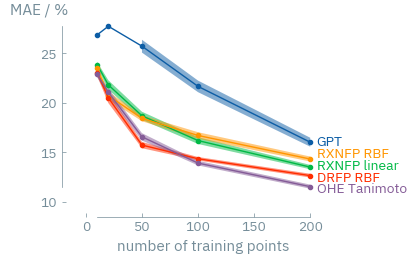

In [11]:

fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"],
    label="GPT",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    - compiled_grouped_res.loc["DreherDoyle", :]["mae"]["sem"],
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    + compiled_grouped_res.loc["DreherDoyle", :]["mae"]["sem"],
    alpha=.5
)

ax.plot(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"],
    label="RXNFP linear",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"] - compiled_rxnfp_linear_grouped["mae"]["sem"],
    compiled_rxnfp_linear_grouped["mae"]["mean"] + compiled_rxnfp_linear_grouped["mae"]["sem"],
    alpha=.5
)

ax.plot(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"],
    label="RXNFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"] - compiled_rxnfp_rbf_grouped["mae"]["sem"],
    compiled_rxnfp_rbf_grouped["mae"]["mean"] + compiled_rxnfp_rbf_grouped["mae"]["sem"],
    alpha=.5
)

ax.plot(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"],
    label="DRFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"] - compiled_drfp_linear_grouped["mae"]["sem"],
    compiled_drfp_linear_grouped["mae"]["mean"] + compiled_drfp_linear_grouped["mae"]["sem"],
    alpha=.5
)

ax.plot(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"],
    label="OHE Tanimoto",
    marker="o",
)

ax.fill_between(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["sem"],
    compiled_ohe_tanimoto_grouped["mae"]["mean"] + compiled_ohe_tanimoto_grouped["mae"]["sem"],
    alpha=.5
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / %", y_pad=0.03)
# ax.set_xscale('log')

range_frame(
    ax, 
     compiled_ohe_tanimoto_grouped.index,
     np.stack(
    [  compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"],
    #+ compiled_grouped_res.loc["DreherDoyle", :]["mae"]["sem"], 
    compiled_ohe_tanimoto_grouped["mae"]["mean"] #- compiled_ohe_tanimoto_grouped["mae"]["sem"]
    ]
     ).flatten()
)

fig.savefig("doyle_regression_res.pdf", bbox_inches="tight")